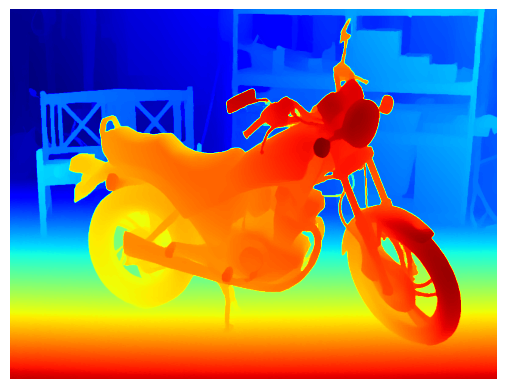

In [1]:
import cv2
import numpy as np
import onnxruntime as rt
from matplotlib import pyplot as plt

img_size = (608, 800)
images = np.random.rand(2, 3, *img_size).astype(np.float32)

img_path = "demo/Motorcycle"
model_name = "middlebury"

image1 = cv2.imread(f"{img_path}/im0.png")
image2 = cv2.imread(f"{img_path}/im1.png")

image1 = cv2.resize(image1, (img_size[1], img_size[0]))
image2 = cv2.resize(image2, (img_size[1], img_size[0]))

image1 = image1.transpose(2, 0, 1).astype(np.float32) / 255.0
image2 = image2.transpose(2, 0, 1).astype(np.float32) / 255.0

image1 = 2 * np.expand_dims(image1, axis=0) - 1
image2 = 2 * np.expand_dims(image2, axis=0) - 1

sess = rt.InferenceSession(f"pretrained_models/{model_name}.onnx")
images = np.concatenate([image1, image2], axis=0)
disp = sess.run(None, {"images": images})[0].squeeze()
plt.imsave(f"{img_path}/{model_name}.png", disp, cmap="jet")

plt.imshow(disp, cmap="jet")
plt.axis("off")
plt.show()